# 🔬 Problem Statement:

- A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

### Approach –

- Step 1: Understand the data by doing the EDA with different visualizations to understand the patterns. Pre process the data like Handling outliers & Null values, applying one hot encoding or label encoding etc.

- Step 2: Split the data to train and test.

- Step 3: Build a basic model using the Decision tree.

- Step 4: Do hyperparameter tuning on the model.

- Step 5: Apply Random Forest, Bagging and boosting methods.

- Ste6 6: Create a chart which shows the accuracy of all the models you have build

- Step 7: Write conclusions.

In [1]:
# Importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## About the data:

- Let’s consider a Company dataset with around 10 variables and 400 records.

- The attributes are as follows:

 Sales

 Competitor Price

 Income

 Advertising

 Population

 Price

 Shelf Location at stores

 Age

 Education

 Urban

 US

# 🔍 EDA & Exploring Dataset

In [3]:
# Creating a copy of the dataset for comparison purposes

data = df.copy()
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


- Population column seems to have outliers, but will confirm others with Boxplot.

In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

- There are no missing values & duplicates in the dataset.

In [8]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [9]:
data['Urban'].nunique()

2

In [10]:
data['US'].nunique()

2

In [11]:
data['ShelveLoc'].value_counts()

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

In [12]:
data['Urban'].value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

In [13]:
data['US'].value_counts()

US
Yes    258
No     142
Name: count, dtype: int64

- The 'US' & 'Urban' columns seem to have unbalanced count of 'Yes & No' values.

# 📈 Data Visualizations

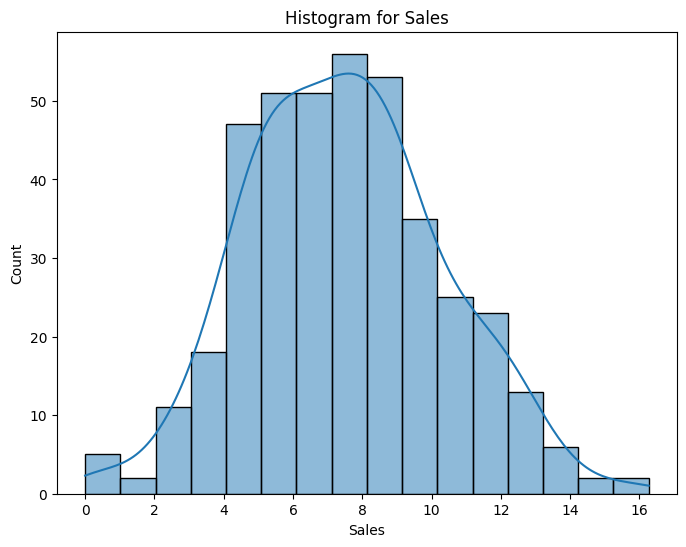

In [14]:
plt.figure(figsize = (8, 6))
sns.histplot(data['Sales'], kde=True)
plt.title('Histogram for Sales')
plt.show()

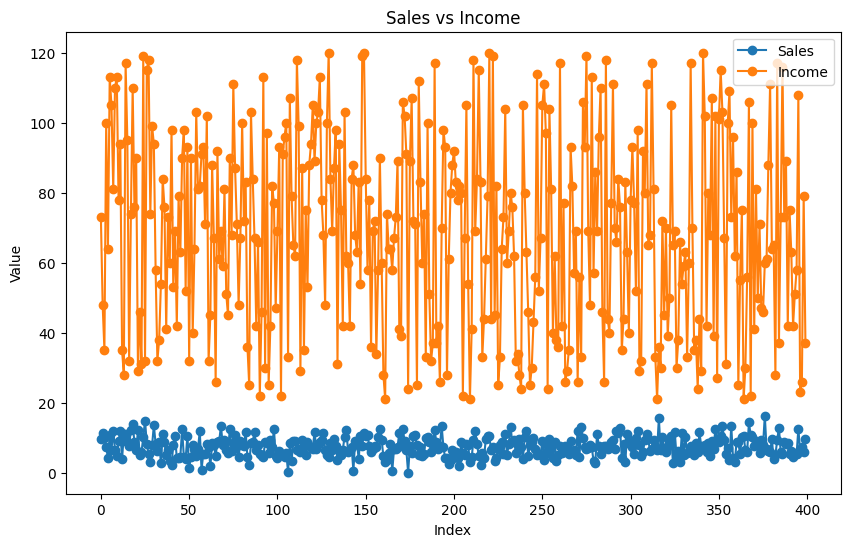

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(data['Sales'], label='Sales', marker='o')
plt.plot(data['Income'], label='Income', marker='o')
plt.title('Sales vs Income')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# 🔍 Key Insights

1. Magnitude Gap

    - Income is consistently much higher than Sales across all indices.

    - This suggests either high operational costs, external funding, or a business model where revenue ≠ direct sales.

2. Stability vs Volatility

    - Sales values are tightly clustered, indicating stable performance or limited growth.

    - Income values fluctuate more, which could reflect seasonal effects, investment returns, or variable external factors.

3. Trend Comparison

    - If the lines are connected sequentially, you can observe whether Sales and Income move together (correlated) or diverge.

    - If Income rises while Sales stay flat, it may signal non-sales-driven income sources.

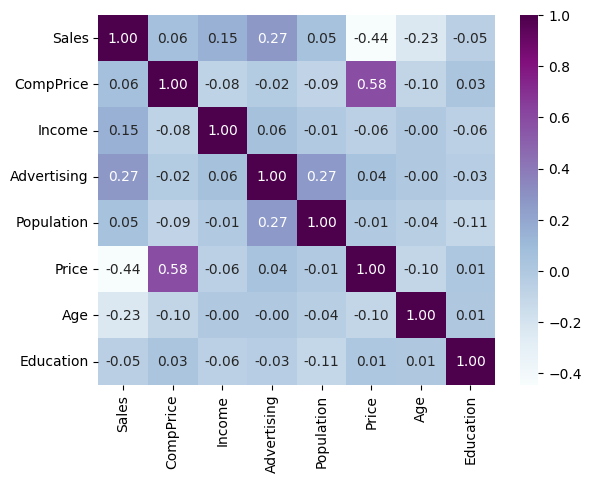

In [16]:
numeric = data.select_dtypes(include='number')

sns.heatmap(numeric.corr(), fmt='.2f', cmap = 'BuPu', annot=True)
plt.show()

- Only Price & CompPrice column seem related to each other.

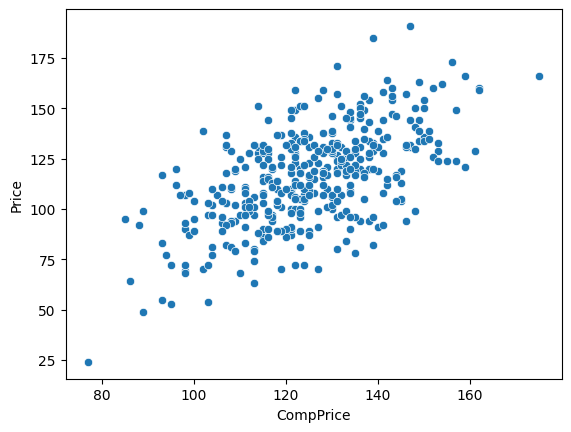

In [17]:
sns.scatterplot(x = data['CompPrice'], y = data['Price'], palette = 'viridis')
plt.show()

- A Upward Positive Co-relation in the above graph.

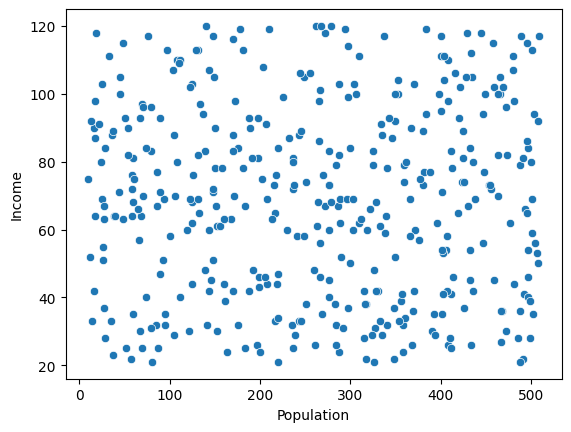

In [18]:
sns.scatterplot(x = data['Population'], y = data['Income'])
plt.show()

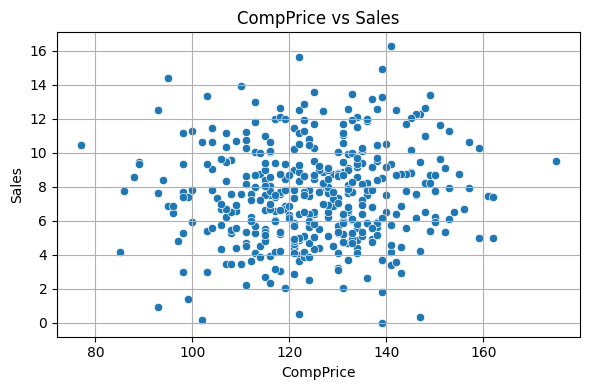

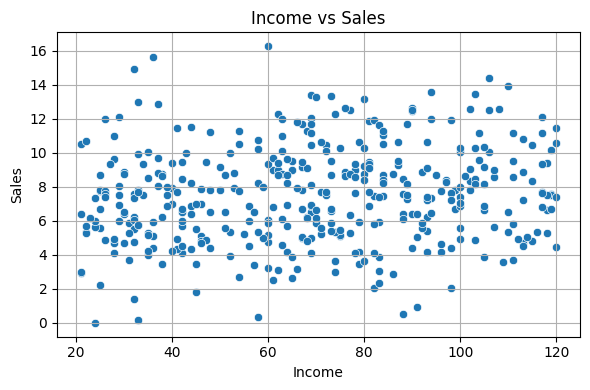

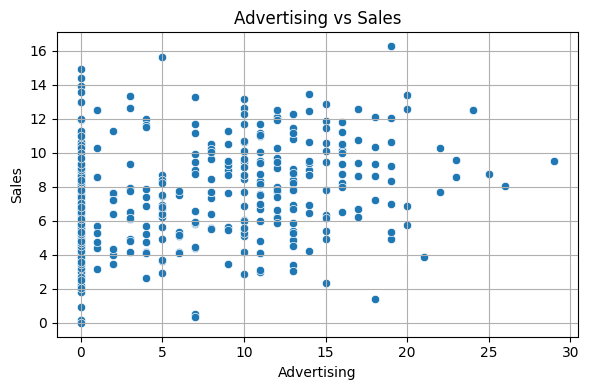

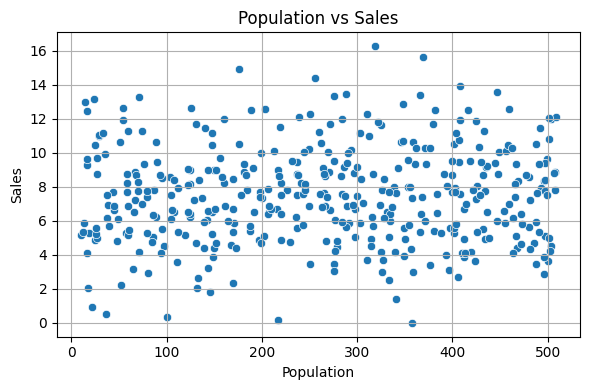

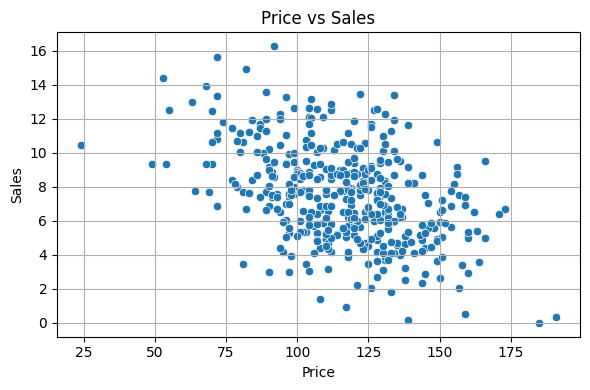

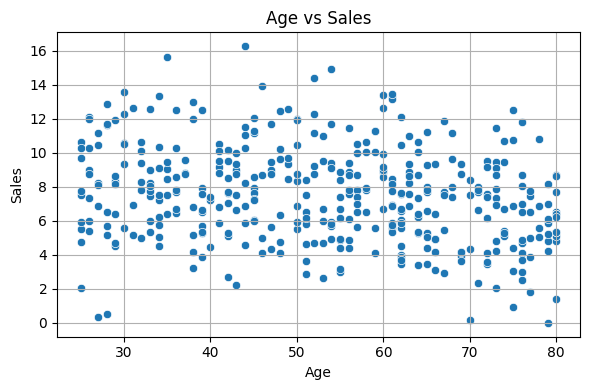

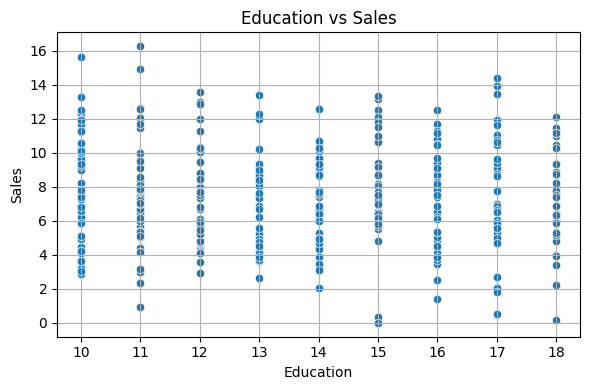

In [19]:
# Choose a target column to compare against
target = 'Sales'

# Loop through numeric columns and plot
for col in numeric:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 🔍 Insight on Feature Relationships
- The correlation analysis reveals that most numeric features show weak or inconsistent relationships with the target variable Sales. Several predictors exhibit low correlation coefficients, and some even show negative associations, suggesting they may not contribute meaningfully to a predictive model.

- This indicates that the dataset, in its current form, may not be well-suited for accurate Sales prediction using linear or tree-based models. The signal-to-noise ratio appears low, and the features may lack direct influence on the target.

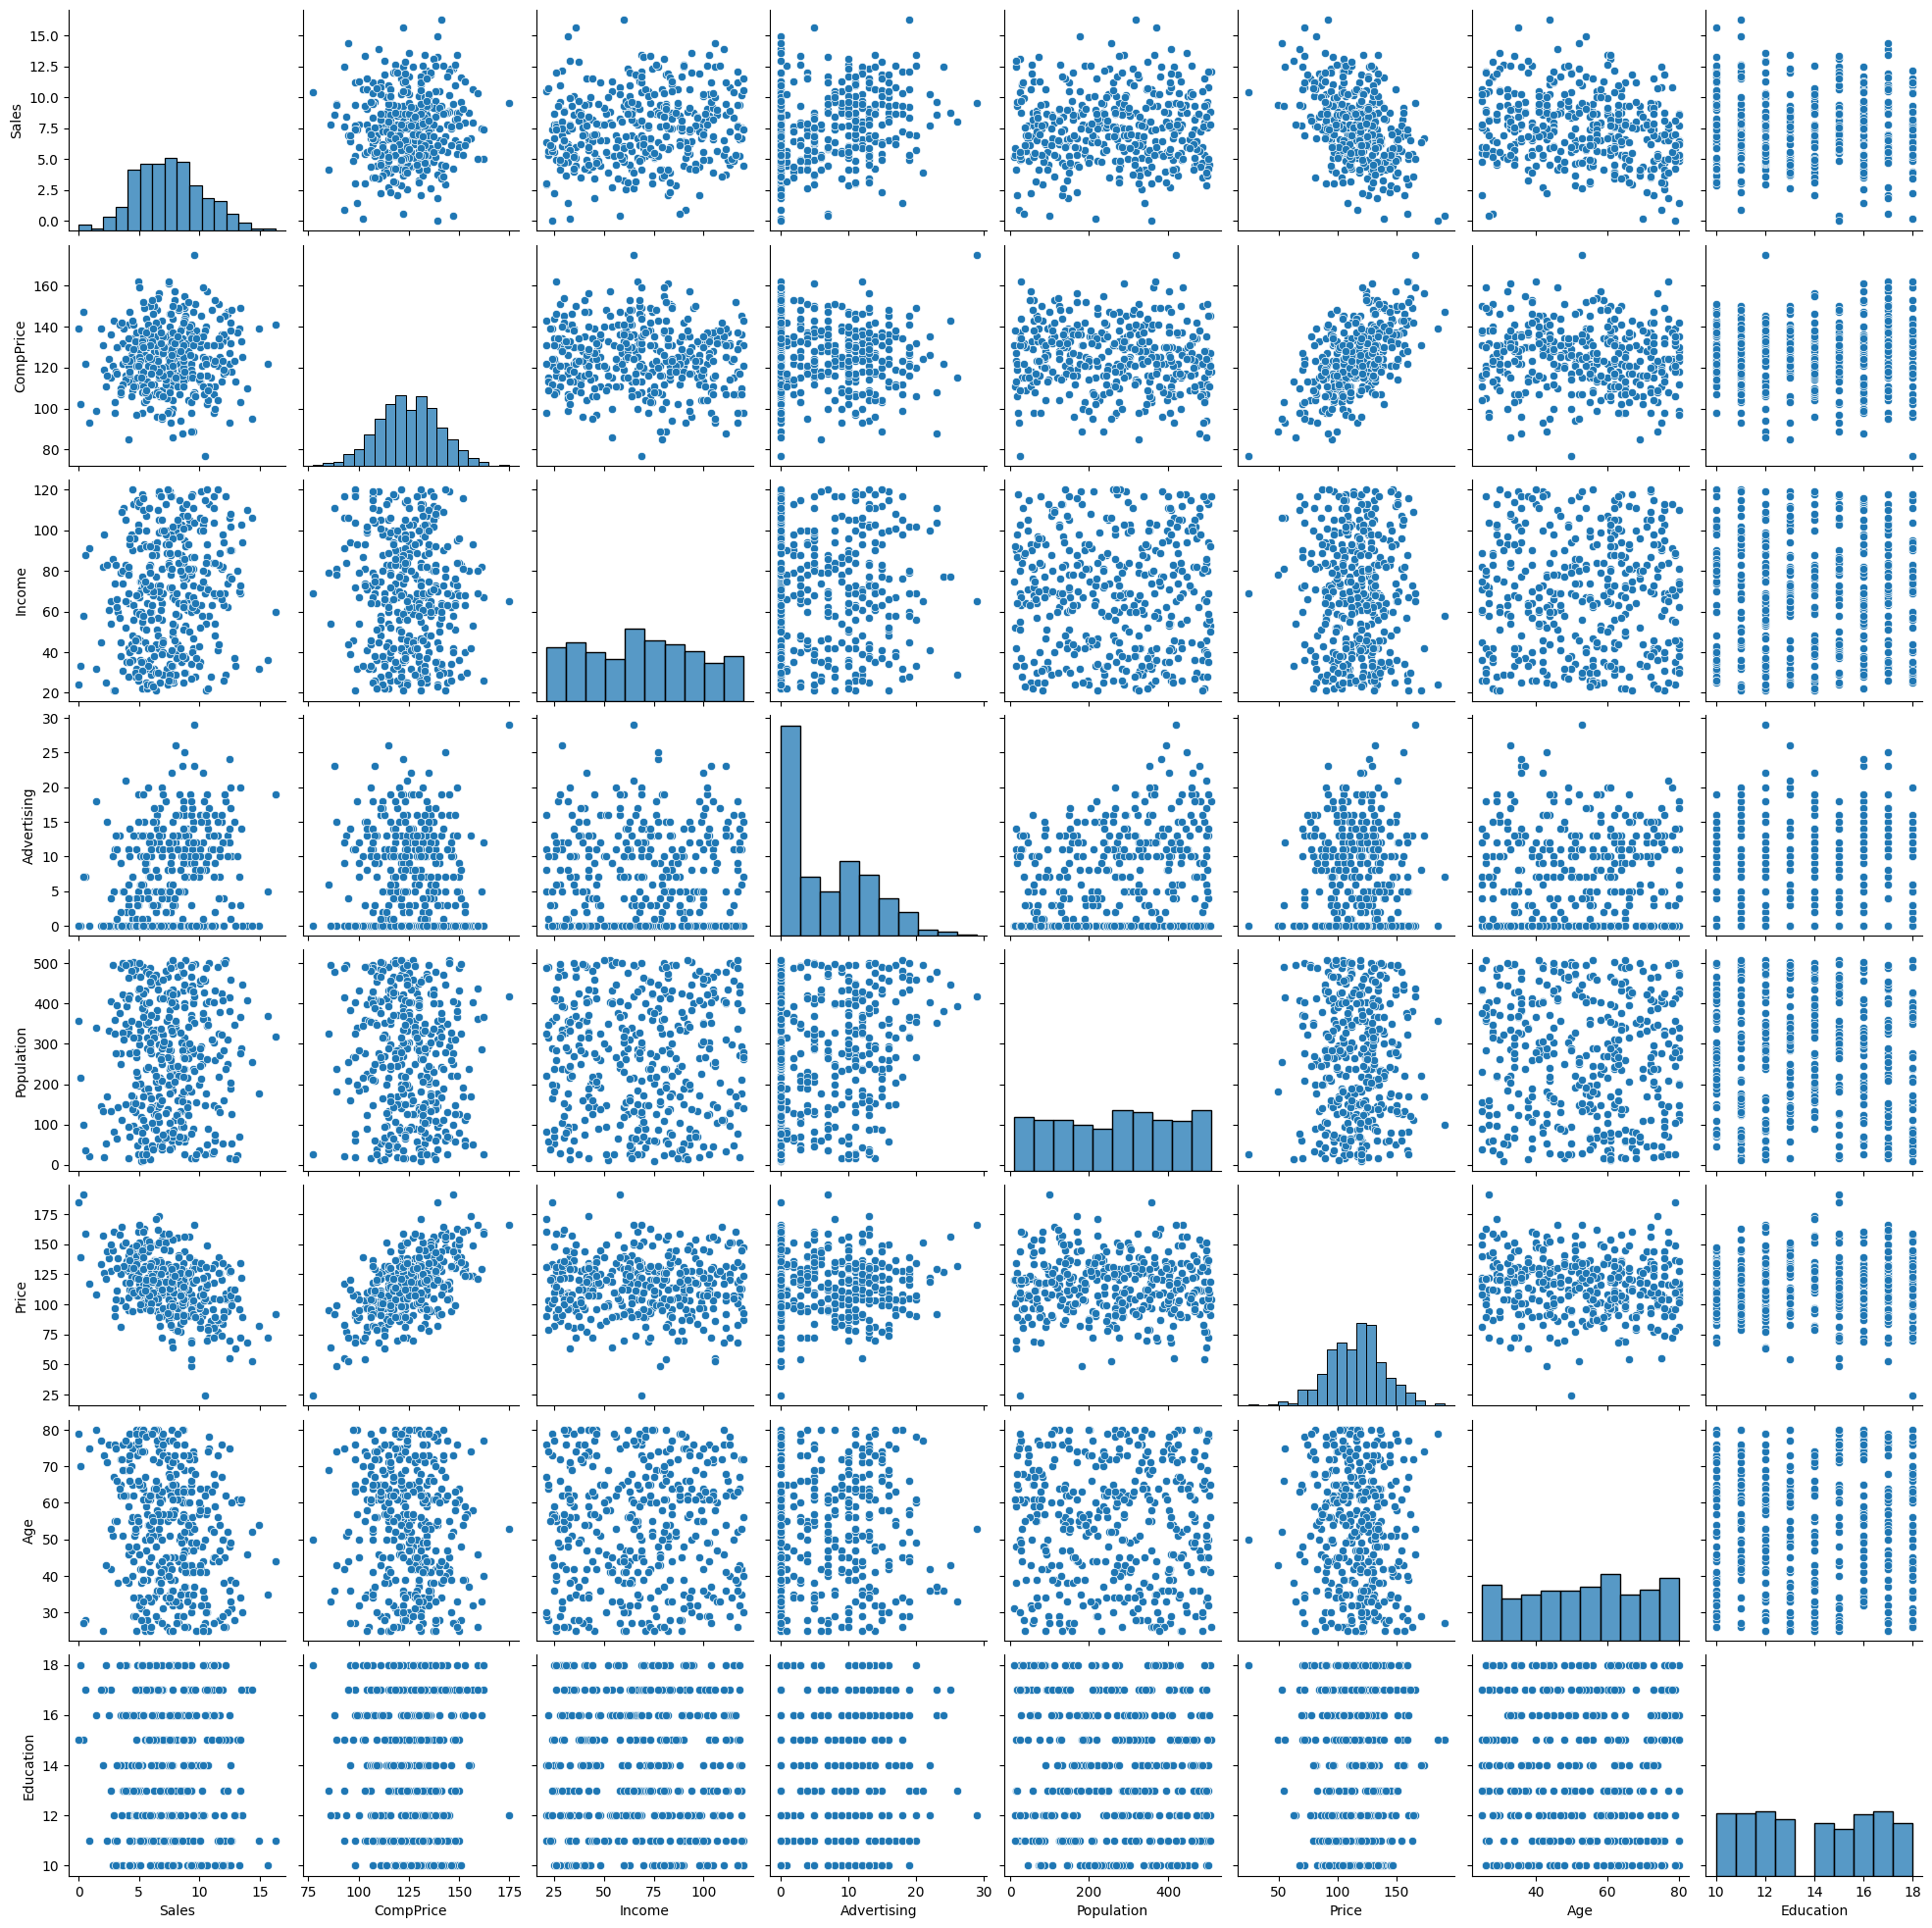

In [20]:
sns.pairplot(data.select_dtypes(include = 'number'))

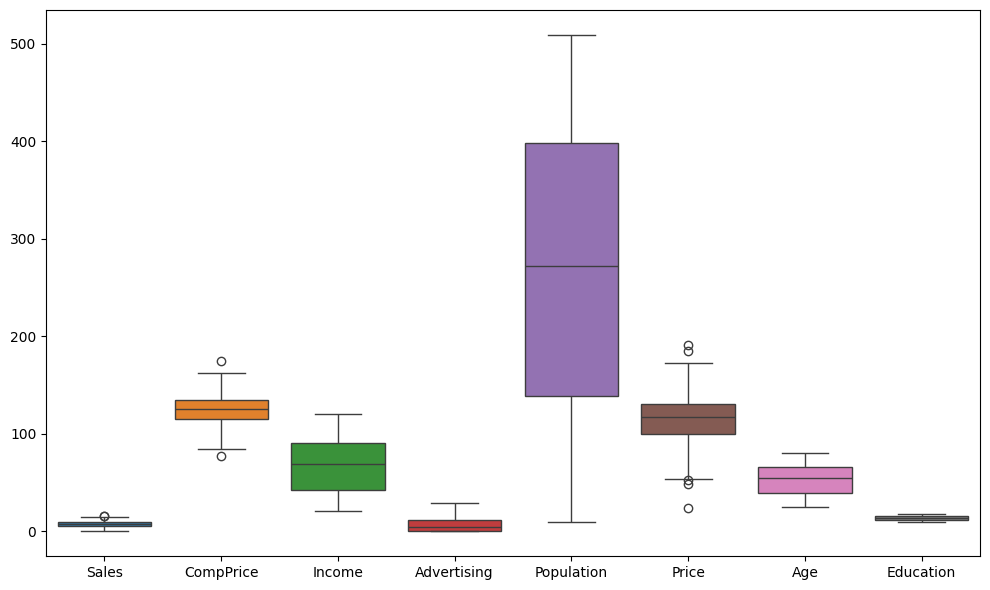

In [21]:
plt.figure(figsize = (10, 6))
sns.boxplot(data)
plt.tight_layout()
plt.show()

- Sales, CompPrice, Price columns have outliers.

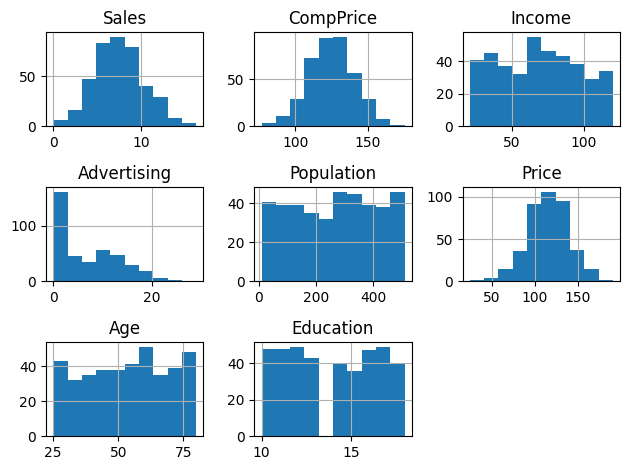

In [22]:
data.hist()
plt.tight_layout()
plt.show()

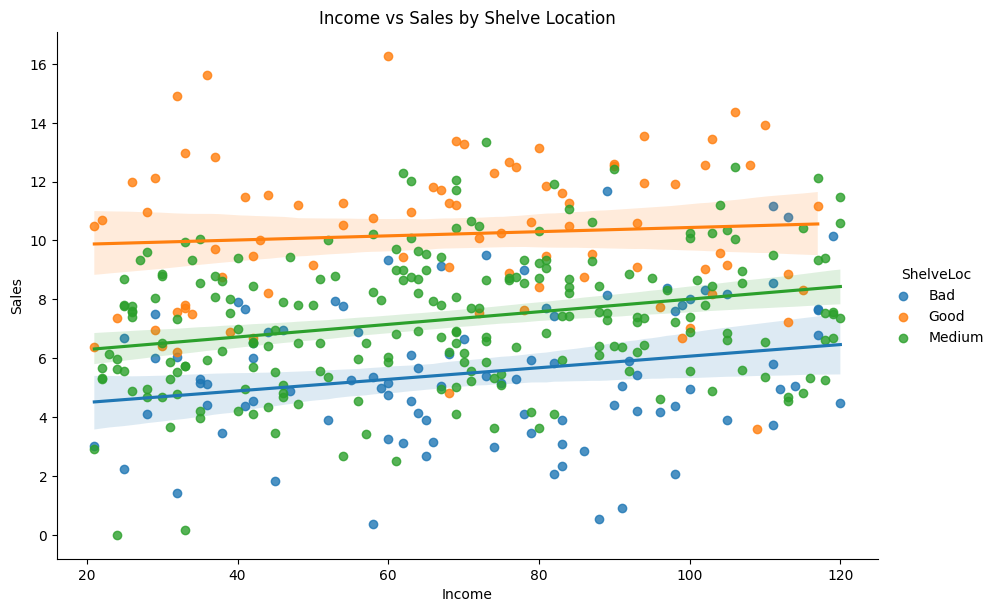

In [23]:
# Regression plot with hue
sns.lmplot(data=data, x='Income', y='Sales', hue='ShelveLoc', height=6, aspect=1.5)
plt.title('Income vs Sales by Shelve Location')
plt.show()

### 📊 Visual Insight

- The plot compares how **Income** influences **Sales**, segmented by **ShelveLoc** categories: `Bad`, `Medium`, and `Good`.
- Each category has its own regression line and confidence band, showing the trend and variability.

---

### 🔍 Key Observations

1. **Positive Relationship Across All Categories**  
   - For all shelf locations, **Sales tend to increase with Income** — higher consumer income is generally associated with higher product sales.

2. **ShelveLoc Matters Significantly**  
   - Products placed in **Good shelf locations consistently outperform** those in Medium or Bad locations at every income level.
   - The **slope** of the regression line for `Good` is steeper, indicating a stronger income-sales relationship.

3. **Bad ShelveLoc Shows Weakest Performance**  
   - Even as Income rises, products in `Bad` locations show **limited growth in Sales**, suggesting poor visibility or accessibility.

---

### 🧠 Strategic Interpretation

- **Shelf placement is a key driver of sales**, potentially more influential than income alone.
- For marketing or inventory decisions, prioritizing **premium shelf locations** could yield higher returns, especially in high-income regions.
- This insight supports using `ShelveLoc` as a **high-importance feature** in decision tree or ensemble models.

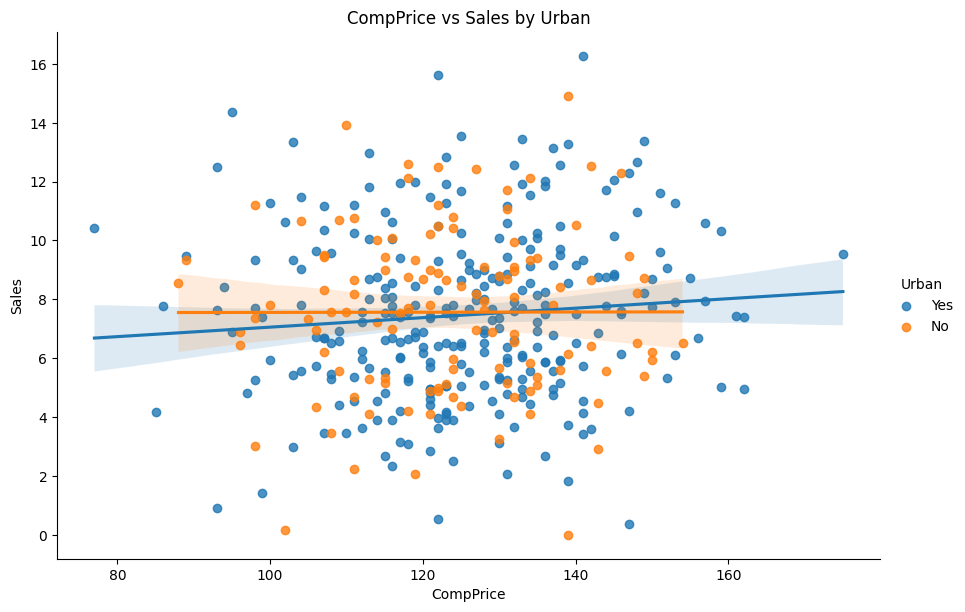

In [24]:
# Regression plot with hue
sns.lmplot(data=data, x='CompPrice', y='Sales', hue='Urban', height=6, aspect=1.5)
plt.title('CompPrice vs Sales by Urban')
plt.show()

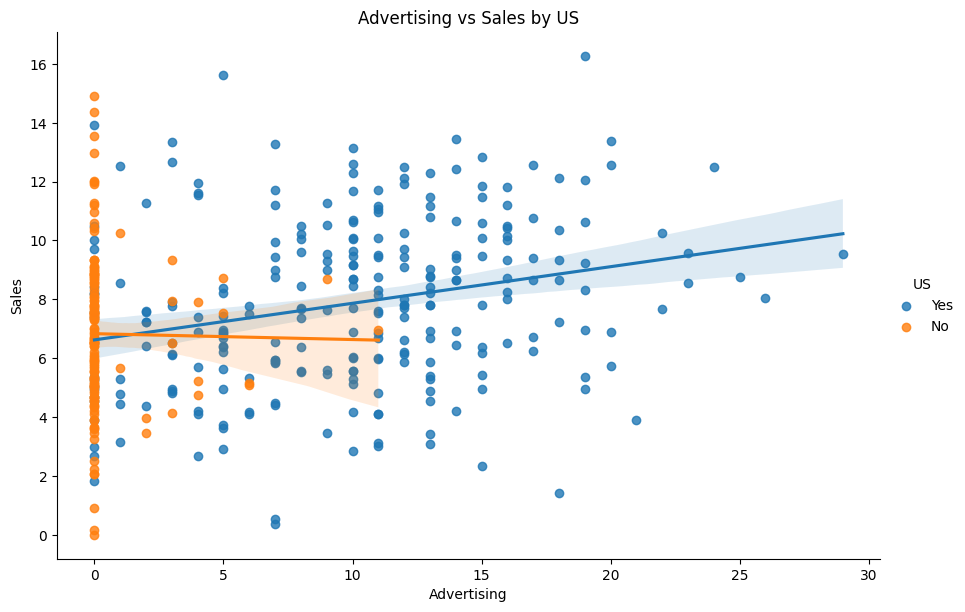

In [25]:
# Regression plot with hue
sns.lmplot(data=data, x='Advertising', y='Sales', hue='US', height=6, aspect=1.5)
plt.title('Advertising vs Sales by US')
plt.show()

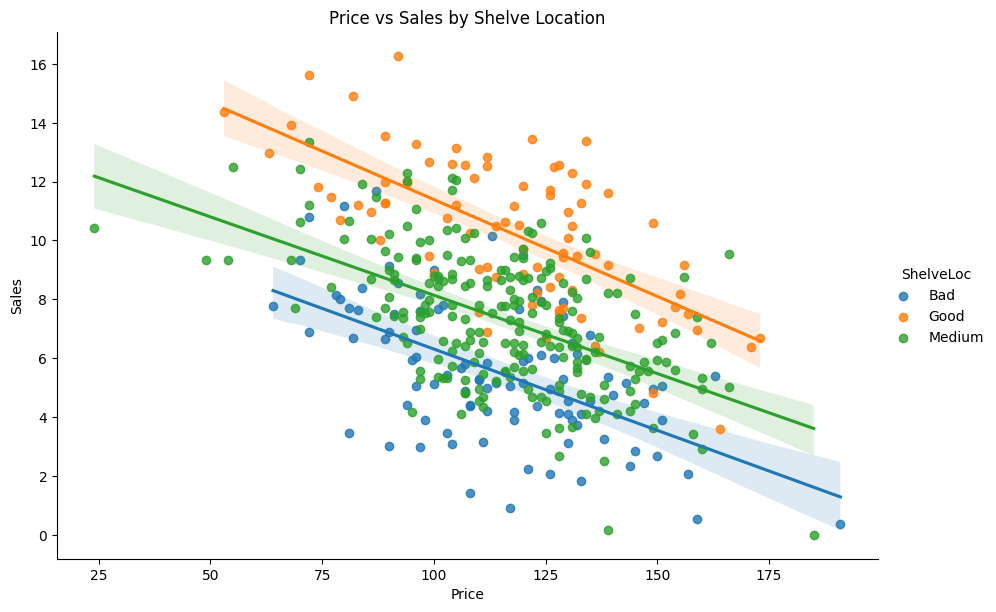

In [26]:
# Regression plot with hue
sns.lmplot(data=data, x='Price', y='Sales', hue='ShelveLoc', height=6, aspect=1.5)
plt.title('Price vs Sales by Shelve Location')
plt.show()

# 🔍 Key Insights on all 3 Graphs

### 📊 **Graph 1: Price vs Sales by Shelf Location**

* 📉 **Sales drop as Price rises** (negative correlation).
* 🟠 **Good Shelf Location = highest sales**, even at higher prices.
* 🟢 **Medium Shelf Location = average sales**.
* 🔵 **Bad Shelf Location = lowest sales**.
  👉 **Shelf placement strongly impacts customer buying decisions.**

---

### 📢 **Graph 2: Advertising vs Sales by US (Yes/No)**

* 🇺🇸 **US Market (Yes):** Advertising 📈 boosts sales.
* 🌍 **Non-US Market (No):** Advertising has little to no effect, sometimes 📉 negative.
  👉 Advertising works **better in the US** than in other markets.

---

### 🏙️ **Graph 3: CompPrice vs Sales by Urban (Yes/No)**

* 🏙️ **Urban Areas (Yes):** Slight 📈 rise in sales when competitor prices are high.
* 🌄 **Non-Urban Areas (No):** Flat ➖ or slightly 📉 negative effect of competitor pricing.
  👉 Competitor pricing has **weak influence overall**, stronger only in urban settings.

---

## 🔑 **Combined Insights**

1. 🛒 **Shelf Location is King 👑** → Good > Medium > Bad (biggest sales driver).
2. 💰 **Price sensitivity exists** → Higher price = lower sales, but good placement reduces this effect.
3. 📢 **Advertising pays off in the US 🇺🇸**, but not much outside.
4. ⚖️ **Competitor price matters less** → Only slight effect in urban areas.
5. ✅ **Best Strategy**:

   * Focus on **premium shelf placement 🛒✨**.
   * Invest in **advertising in US markets 📢🇺🇸**.
   * Keep pricing competitive but don’t over-rely on competitor moves.

# 🔤 Encoding Categorical Columns.

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Copy the original DataFrame
df_encoded = data.copy()

# Apply LabelEncoder to each object (categorical) column
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [28]:
df_encoded.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [29]:
df_encoded.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

# 🧪 Handling Outliers

In [30]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        # In-place capping using np.where
        data[col] = np.where(data[col] > upper, upper,
                     np.where(data[col] < lower, lower, data[col]))

In [31]:
capping(df_encoded, df_encoded.columns)

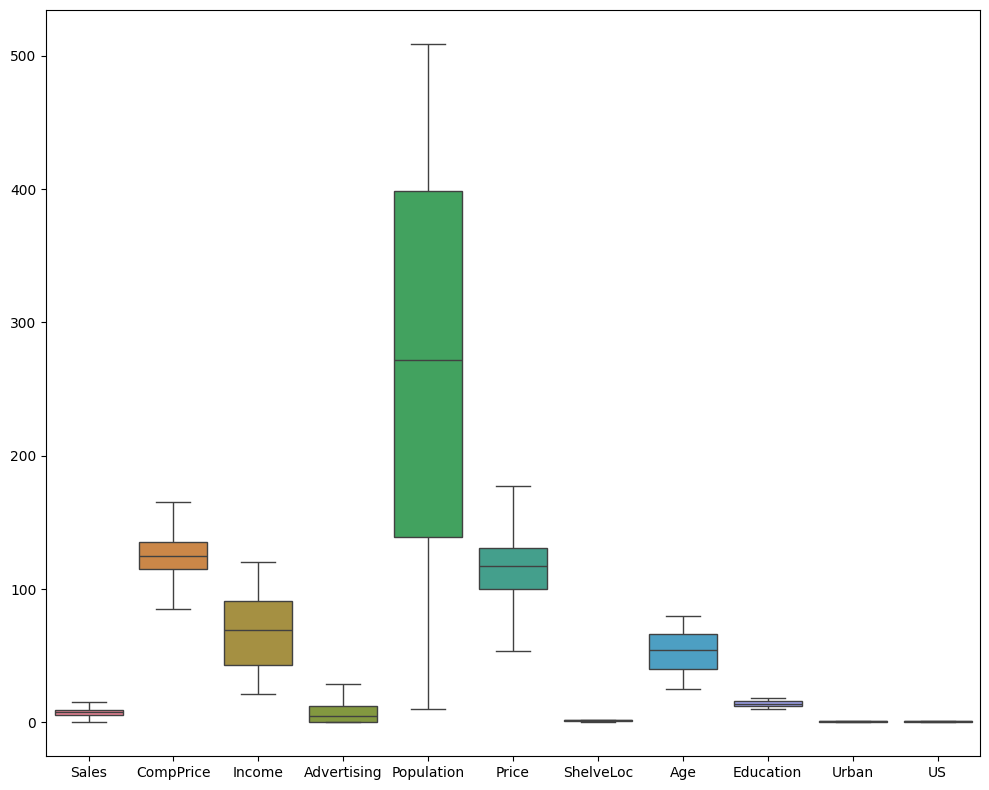

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(df_encoded)
plt.tight_layout()
plt.show()

- The outliers in this Dataset are cleared.
- Missing values & duplicate values are not present in the dataset.
- Encoded the categorical columns in this dataset too.

- The dataset 'df_encoded' is ready for Model Building & Prediction.

# 🏗️ Model Building